# 🩺 Bài thực hành 1: Phân tích dữ liệu và chuẩn bị nhãn
Trong bài này, sinh viên sẽ làm quen với tập dữ liệu Medical Chat, phân tích triệu chứng và chuẩn bị dữ liệu huấn luyện.

In [8]:
%pip install pandas matplotlib seaborn scikit-learn -q


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

In [10]:
# Bước 1: Load dữ liệu
# Dataset chứa 2 cột: 'text' (triệu chứng), 'labels' (danh sách bệnh dự đoán)
df = pd.read_csv('/Users/dinhquanghien/Documents/Học tập/pre_2/data/medical_chat_dataset.csv')
df.head()

,text,labels
0,Tôi bị ho và sốt suốt ba ngày nay.,"['viêm phổi', 'sốt virus']"
1,Tôi thấy đau bụng dữ dội và tiêu chảy.,['ngộ độc thực phẩm']
2,Tôi thường xuyên chóng mặt và nhức đầu.,"['thiếu máu', 'cao huyết áp']"
3,"Khó thở, ho khan và cảm thấy mệt mỏi.","['covid-19', 'viêm phổi']"
4,"Tôi có triệu chứng giống như cảm cúm, đau họng...",['cảm lạnh']


In [11]:
# Bước 2: Đảm bảo cột labels là danh sách
import ast

def parse_labels(s):
    if pd.isna(s): 
        return []
    try:
        x = ast.literal_eval(str(s))
        return x if isinstance(x, list) else [x]
    except Exception:
        # nếu parse lỗi, giữ nguyên như một nhãn
        return [str(s)]

df['labels'] = df['labels'].apply(parse_labels)
df['labels'].head()


0       [viêm phổi, sốt virus]
1          [ngộ độc thực phẩm]
2    [thiếu máu, cao huyết áp]
3        [covid-19, viêm phổi]
4                   [cảm lạnh]
Name: labels, dtype: object

In [12]:
# Bước 3: Thống kê số lượng bệnh
mlb = MultiLabelBinarizer()
label_matrix = mlb.fit_transform(df['labels'])

label_counts = pd.Series(label_matrix.sum(axis=0), index=mlb.classes_)
label_counts = label_counts.sort_values(ascending=False)
label_counts.head(10)


Tĩnh mạch giãn                171
Thủy đậu                      171
Bệnh thoái hóa đốt sống cổ    171
Bệnh vẩy nến                  171
chốc lở                       171
Dị ứng                        171
Sốt xuất huyết                171
Bệnh tiểu đường               171
Viêm khớp                     171
Sốt rét                       171
dtype: int64

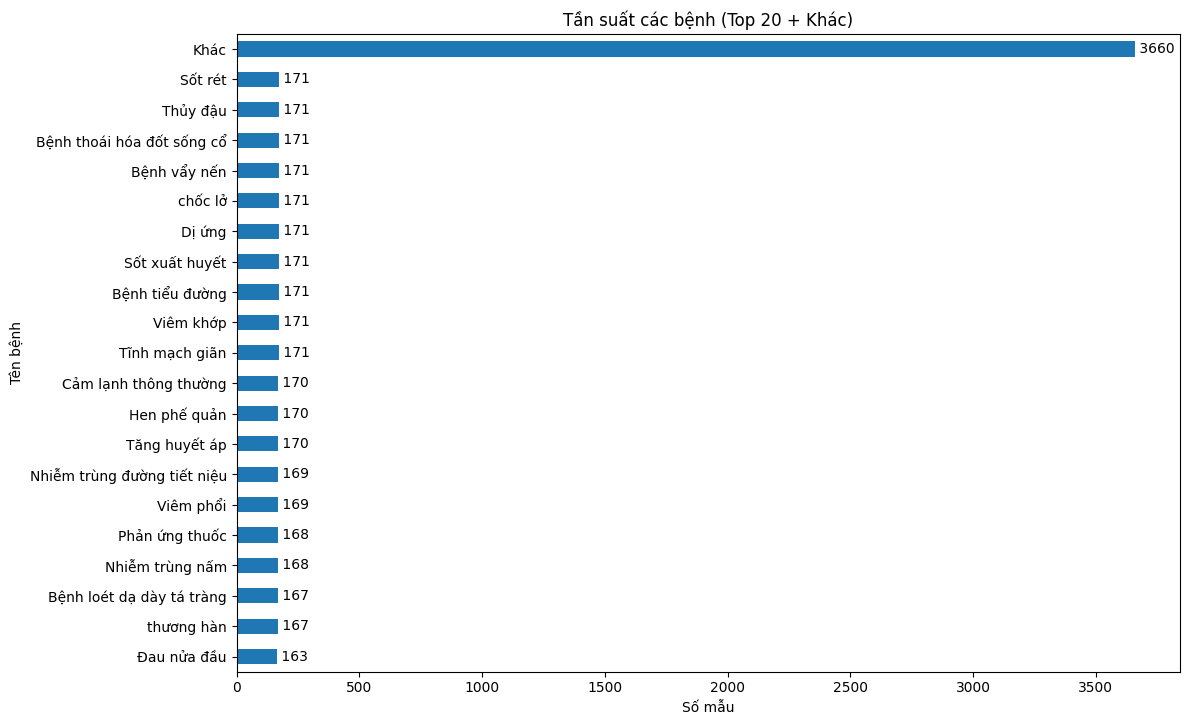

In [13]:
# Bước 4: Vẽ Top-N + gộp các nhãn ít gặp vào "Khác"
top_n = 20  

lc_sorted = label_counts
top = lc_sorted.head(top_n)
other_sum = int(lc_sorted.iloc[top_n:].sum())

if other_sum > 0:
    top = pd.concat([top, pd.Series({"Khác": other_sum})])

# Vẽ: sắp xếp tăng dần để barh hiển thị đẹp
to_plot = top.sort_values(ascending=True)

plt.figure(figsize=(12, max(6, 0.35 * len(to_plot))))  
ax = to_plot.plot(kind='barh')
ax.set_title(f"Tần suất các bệnh (Top {top_n} + Khác)")
ax.set_xlabel("Số mẫu")
ax.set_ylabel("Tên bệnh")

# Ghi số lên cuối mỗi thanh
for i, v in enumerate(to_plot.values):
    ax.text(v, i, f" {int(v)}", va='center')

plt.tight_layout()
plt.show()


In [14]:
# Bước 4: Lưu nhãn đã xử lý (nếu cần)
df['binary_labels'] = label_matrix.tolist()
df.to_csv('processed_medical_chat_dataset.csv', index=False)
print('✅ Đã lưu dữ liệu đã xử lý.')

✅ Đã lưu dữ liệu đã xử lý.
